In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

In [4]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

(1797, 64)


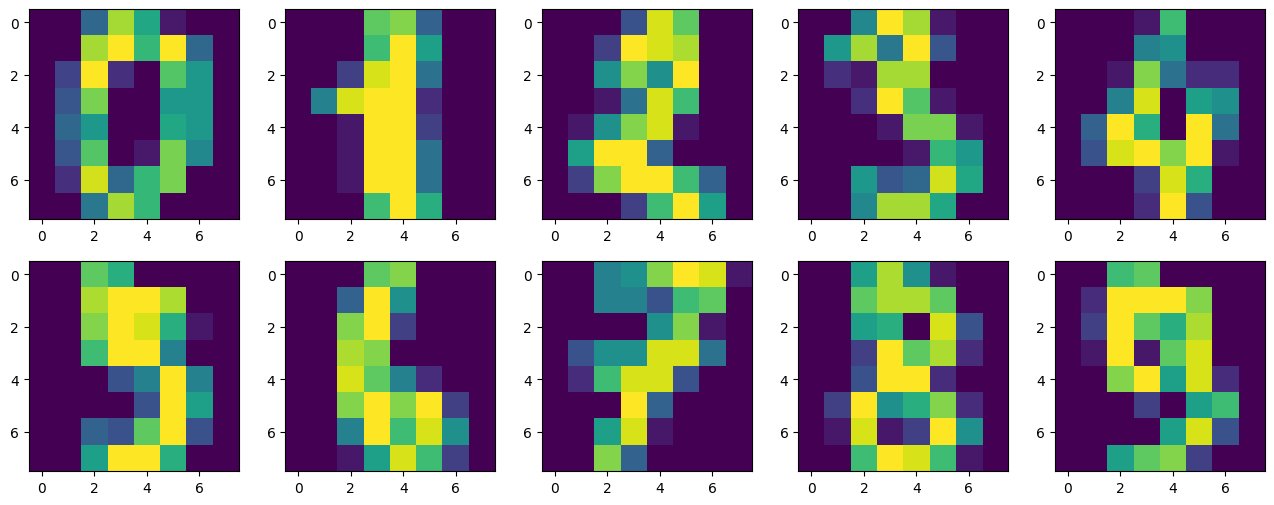

In [5]:
X, y = load_digits(return_X_y=True)
print(X.shape)
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i, :].reshape(8, 8))

In [6]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [9]:
epochs = [100, 1000, 10000]
neuron_nums = [5, 10, 15, 20]
learning_rates = [0.01, 0.1, 0.5]
def two_layer_nn(num_epochs, neuron_num, learning_rate):

    np.random.seed(1)
    w0 = np.random.random((64, neuron_num))
    w1 = np.random.random((neuron_num, 10))

    errors = []
    metrics = []

    for i in range(num_epochs):
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        layer2_error = layer2 - y_train
        layer2_grad = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_grad.dot(w1.T)
        layer1_grad = layer1_error * sigmoid_deriv(layer1)

        w1 -= layer1.T.dot(layer2_grad) * learning_rate
        w0 -= layer0.T.dot(layer1_grad) * learning_rate

        error = np.mean(np.abs(layer2_error))
        errors.append(error)

        preds = np.argmax(layer2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
    layer0_test = X_test
    layer1_test = sigmoid(np.dot(layer0_test, w0))
    layer2_test = sigmoid(np.dot(layer1_test, w1))
    preds_test = np.argmax(layer2_test, axis=1)
    labels_test = np.argmax (y_test, axis=1)
    accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)
    # print(f"accuracy на тесте {accuracy_test:.2f}%")
    print(f"{num_epochs}, {neuron_num}, {learning_rate}-----accuracy на train {accuracy:.2f}% на test {accuracy_test:.2f}%")
    return {accuracy: (num_epochs, neuron_num, learning_rate)}

In [10]:
max_accuracy = 0
params = {}
for epoch in epochs:
    for neuron_num in neuron_nums:
        for lrn_rate in learning_rates:
            params_accuracy = two_layer_nn(epoch, neuron_num, lrn_rate)
            if list(params_accuracy.keys())[0] > max_accuracy:
                max_accuracy = list(params_accuracy.keys())[0]
                params = params_accuracy

params

100, 5, 0.01-----accuracy на train 50.29% на test 50.51%
100, 5, 0.1-----accuracy на train 33.25% на test 46.63%
100, 5, 0.5-----accuracy на train 17.29% на test 27.78%
100, 10, 0.01-----accuracy на train 76.89% на test 70.88%
100, 10, 0.1-----accuracy на train 54.95% на test 56.90%
100, 10, 0.5-----accuracy на train 24.94% на test 37.04%


/var/folders/6b/trflvtg149bbjj4kbzxvyyzh0000gn/T/ipykernel_28411/4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


100, 15, 0.01-----accuracy на train 87.28% на test 84.34%
100, 15, 0.1-----accuracy на train 71.74% на test 68.18%
100, 15, 0.5-----accuracy на train 5.24% на test 21.21%
100, 20, 0.01-----accuracy на train 92.93% на test 90.07%
100, 20, 0.1-----accuracy на train 75.56% на test 75.42%
100, 20, 0.5-----accuracy на train 32.34% на test 48.82%
1000, 5, 0.01-----accuracy на train 59.52% на test 57.91%
1000, 5, 0.1-----accuracy на train 58.60% на test 42.26%
1000, 5, 0.5-----accuracy на train 43.14% на test 42.42%
1000, 10, 0.01-----accuracy на train 85.62% на test 81.82%
1000, 10, 0.1-----accuracy на train 83.21% на test 80.13%
1000, 10, 0.5-----accuracy на train 72.32% на test 73.57%
1000, 15, 0.01-----accuracy на train 90.52% на test 85.52%
1000, 15, 0.1-----accuracy на train 90.86% на test 87.88%
1000, 15, 0.5-----accuracy на train 74.65% на test 73.40%
1000, 20, 0.01-----accuracy на train 97.42% на test 92.93%
1000, 20, 0.1-----accuracy на train 95.68% на test 91.75%
1000, 20, 0.5-----

{np.float64(97.42310889443058): (1000, 20, 0.01)}

Увеличение количества нейронов в общем положительно влияет на точность классификации. С ростом количества итераций качество сети также растет, но не так значительно, количество итераций должно быть правильно соотносено со скоростью обучения - слишком большой темп при малом количестве итераций дает плохой результат.